In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!ls

0.PythonCrashCourse	      4.python_intro		    hello.py
1.python-intro-hse	      5.ds_intro_course		    titanic
2.scientific-python-lectures  dc_employees_data.csv	    Untitled Document
3.HSEML			      EDA_for_lamodatraining.ipynb  Untitled Document 2


In [3]:
pd.read_csv("dc_employees_data.csv")

ParserError: Error tokenizing data. C error: Expected 7 fields in line 135, saw 8


In [4]:
pd.read_csv("dc_employees_data.csv", error_bad_lines=False)

b'Skipping line 135: expected 7 fields, saw 8\nSkipping line 177: expected 7 fields, saw 8\nSkipping line 178: expected 7 fields, saw 8\nSkipping line 207: expected 7 fields, saw 8\nSkipping line 241: expected 7 fields, saw 8\nSkipping line 243: expected 7 fields, saw 8\nSkipping line 263: expected 7 fields, saw 8\nSkipping line 431: expected 7 fields, saw 8\nSkipping line 433: expected 7 fields, saw 8\nSkipping line 473: expected 7 fields, saw 8\nSkipping line 567: expected 7 fields, saw 8\nSkipping line 586: expected 7 fields, saw 8\nSkipping line 631: expected 7 fields, saw 8\nSkipping line 693: expected 7 fields, saw 8\nSkipping line 775: expected 7 fields, saw 8\nSkipping line 785: expected 7 fields, saw 8\nSkipping line 797: expected 7 fields, saw 8\nSkipping line 799: expected 7 fields, saw 8\nSkipping line 809: expected 7 fields, saw 8\nSkipping line 901: expected 7 fields, saw 8\nSkipping line 907: expected 7 fields, saw 8\nSkipping line 922: expected 7 fields, saw 8\nSkipping

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 48: invalid start byte

In [5]:
pd.read_csv("dc_employees_data.csv", sep=';', error_bad_lines=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 6: invalid start byte

In [2]:
data = pd.read_csv("dc_employees_data.csv", sep=';', error_bad_lines=False, encoding ='cp1251')
data.head()

,Employee ID,Position ENG,Start date,Base salary monthly,Quit date,Department,Unit,NTT process,Age,Gender,...,Days to hire,If recomended,Recruiter age,Recruiter tenure,Recruiter level,TL Active,Commute,Tenure resulting,If include,Passed probation
0,16749,DC employee,29.09.2017,"0,30001305",13.11.2017,Shift №4,Picking Area,0,33,1,...,-347.0,0,21.0,NaN,11.0,1,"13,3485904",46,1,0
1,16161,DC employee,18.08.2017,1,05.09.2017,Shift №2,New Arrivals Area,0,48,0,...,1291.0,0,28.0,7.0,18.0,1,"1,114272525",19,1,0
2,21271,DC employee,23.10.2018,"0,480664666",18.12.2018,Shift №4,Pack Item Area,0,22,0,...,26.0,0,21.0,NaN,11.0,1,"13,08236479",57,1,0
3,16252,DC employee,26.08.2017,1,NaN,Shift №2,New Arrivals Area,0,24,0,...,1255.0,1,28.0,9.0,18.0,1,"59,15770908",502,1,1
4,19229,DC employee,30.06.2018,"0,480664666",12.07.2018,Shift №2,Picking Area,0,34,1,...,9.0,0,21.0,NaN,11.0,1,"9,868861683",13,1,0


In [7]:
print(data.shape)

print("Записей в таблице: {}\nКоличество признаков: {}".format(data.shape[0], data.shape[1]))

(2674, 37)
Записей в таблице: 2674
Количество признаков: 37


In [25]:
pd.options.display.max_columns = 50
# поставим 50 на случай если будем добавлять новые колонки

In [9]:
data.head()

,Employee ID,Position ENG,Start date,Base salary monthly,Quit date,Department,Unit,NTT process,Age,Gender,TL Tenure,TL Age,TL Exit,TL Gender,Hires per week,Exits per week,Total hires,Total exits,Headcount,Age mean,Age median,Tenure mean,Tenure median,Gender average,entrance_type_id,salary,source_id,Days to hire,If recomended,Recruiter age,Recruiter tenure,Recruiter level,TL Active,Commute,Tenure resulting,If include,Passed probation
0,16749,DC employee,29.09.2017,"0,30001305",13.11.2017,Shift №4,Picking Area,0,33,1,1065.0,23.0,0.0,1.0,8,1,13,0,22,"26,22727273","23,5","140,5454545",14,"0,818181818",1.0,NaN,superjob.ru,-347.0,0,21.0,NaN,11.0,1,"13,3485904",46,1,0
1,16161,DC employee,18.08.2017,1,05.09.2017,Shift №2,New Arrivals Area,0,48,0,268.0,26.0,0.0,1.0,4,0,5,0,24,"33,58333333","34,5","432,8333333","283,5",0,NaN,20000.0,NaN,1291.0,0,28.0,7.0,18.0,1,"1,114272525",19,1,0
2,21271,DC employee,23.10.2018,"0,480664666",18.12.2018,Shift №4,Pack Item Area,0,22,0,38.0,36.0,0.0,1.0,10,8,13,7,46,"34,2826087",33,"285,0869565","101,5","0,043478261",0.0,20000.0,hh.ru,26.0,0,21.0,NaN,11.0,1,"13,08236479",57,1,0
3,16252,DC employee,26.08.2017,1,NaN,Shift №2,New Arrivals Area,0,24,0,268.0,26.0,0.0,1.0,1,0,5,0,24,"33,58333333","34,5","432,8333333","283,5",0,NaN,20000.0,candidate_source_5,1255.0,1,28.0,9.0,18.0,1,"59,15770908",502,1,1
4,19229,DC employee,30.06.2018,"0,480664666",12.07.2018,Shift №2,Picking Area,0,34,1,1260.0,24.0,0.0,1.0,2,2,3,1,12,28,"26,5","259,25",227,1,0.0,NaN,ref,9.0,0,21.0,NaN,11.0,1,"9,868861683",13,1,0


In [10]:
data.columns

Index(['Employee ID', 'Position ENG', 'Start date', 'Base salary monthly',
       'Quit date', 'Department', 'Unit', 'NTT process', 'Age', 'Gender',
       'TL Tenure', 'TL Age', 'TL Exit', 'TL Gender', 'Hires per week',
       'Exits per week', 'Total hires', 'Total exits', 'Headcount', 'Age mean',
       'Age median', 'Tenure mean', 'Tenure median', 'Gender average',
       'entrance_type_id', 'salary', 'source_id', 'Days to hire',
       'If recomended', 'Recruiter age', 'Recruiter tenure', 'Recruiter level',
       'TL Active', 'Commute', 'Tenure resulting', 'If include',
       'Passed probation'],
      dtype='object')

In [11]:
import seaborn as sns

In [12]:
# np.unique(data['Position ENG'].values, return_counts=True)
# np.unique(data['Department'].values, return_counts=True)
# np.unique(data['Unit'].values)
# data['Gender'].values.mean()
# data['TL Tenure'].values
# np.unique(data.dropna(axis=0, subset=['source_id'])['source_id'].values)
# np.unique(data['Total hires'])
# np.unique(data['Headcount'], return_counts=True)
# data[['Base salary monthly','Position ENG','salary']].loc[data['Position ENG'] == 'DC employee']
# data['Days to hire']

In [13]:
# .value_counts() возвращет тоже что и np.unique(data['Employee ID'], return_counts=True)
data.head()['Employee ID'].value_counts()

# Любопытно что для некоторых Employee ID есть несколько записей в таблице

21271    1
16749    1
16252    1
16161    1
19229    1
Name: Employee ID, dtype: int64

In [14]:
data.count()

Employee ID            2674
Position ENG           2674
Start date             2674
Base salary monthly    2674
Quit date              2149
Department             2674
Unit                   2674
NTT process            2674
Age                    2674
Gender                 2674
TL Tenure              2125
TL Age                 2125
TL Exit                2125
TL Gender              2125
Hires per week         2674
Exits per week         2674
Total hires            2674
Total exits            2674
Headcount              2674
Age mean               2674
Age median             2674
Tenure mean            2674
Tenure median          2674
Gender average         2674
entrance_type_id       1815
salary                  476
source_id              1947
Days to hire           2045
If recomended          2674
Recruiter age          1434
Recruiter tenure       1331
Recruiter level        1434
TL Active              2674
Commute                2663
Tenure resulting       2674
If include          

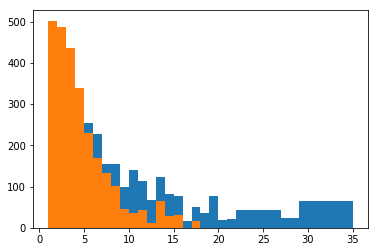

In [102]:
bins = plt.hist(data['Total hires'], bins=np.unique(data['Total hires']));
plt.hist(data['Hires per week'], bins=bins[1]);

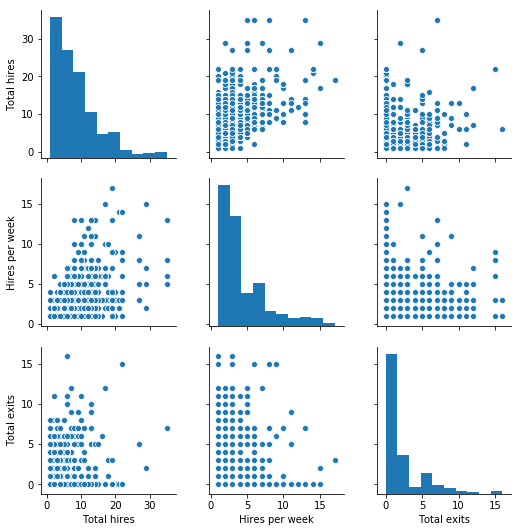

In [16]:
sns.pairplot(data[['Total hires', 'Hires per week', 'Total exits']]);

In [17]:
# vals, counts = np.unique(data['Headcount'], return_counts=True)
# vals, counts

In [12]:
def preprocess_data(data):
    date_columns = ['Start date', 'Quit date']
    to_float_columns = ['Base salary monthly', 'Age mean', 'Age median', 
                         'Tenure mean', 'Tenure median', 'Gender average'] # разделитель везде ','
    
    data[date_columns] = data[date_columns].apply(pd.to_datetime, dayfirst=True)
#--------------
# OR
#     pd.to_datetime(data['Quit date'])
#     pd.to_datetime(data['Start date'])
# OR
#     for cols in date_columns:
#         data[col] = pd.to_datetime(data[col])
#--------------
    data['days_worked'] = data['Quit date'] - data['Start date']
    
# У некоторых людей Quit date - None, они являются сотрудниками, для них days_worked тоже будет None
# по смыслу это верно, однако возможно будет удобно завести поле days_worked_uptoday - количество
# проработанных дней на сегодняшний момент, для этого все None data['Quit date'] надо заменить на сегодняшнюю дату
# Так же преобразуем получившееся значение в int (количество дней)


    dt = pd.datetime.today()
    dt_midnight = pd.datetime.combine(dt, pd.datetime.min.time())
    data['days_worked_uptoday'] = data['Quit date'].fillna(dt_midnight) - data['Start date']
    data['days_worked_uptoday'] = data['days_worked_uptoday'].apply(lambda x: x.days).values
    
    data['q_year'] = data['Quit date'].apply(lambda x: x.year)
    data['q_day'] = data['Quit date'].apply(lambda x: x.day)
    data['q_month'] = data['Quit date'].apply(lambda x: x.month)
    
# про lambda выражения
# это короткий способ писать простые функции
# запись lambda x: x**2
# эквивалентна
# def square(x): return x**2
    

# Обратите внимание что data['Quit date'].fillna(dt_midnight) не меняет значения в самой таблице data!
#-------------


# Теперь обработаем колонки в которых числовые значения хранятся ввиде строк.

    data[to_float_columns] = data[to_float_columns].replace(',', '.', regex=True).applymap(float)
    
# DataFrame.applymap(func) - applies function func elementwise


    

In [4]:
preprocess_data(data)

In [13]:
data.head()

,Employee ID,Position ENG,Start date,Base salary monthly,Quit date,Department,Unit,NTT process,Age,Gender,...,Recruiter level,TL Active,Commute,Tenure resulting,If include,Passed probation,days_worked,days_worked_uptoday,q_day,q_month
0,16749,DC employee,2017-09-29,0.300013,2017-11-13,Shift №4,Picking Area,0,33,1,...,11.0,1,"13,3485904",46,1,0,45 days,45,13.0,11.0
1,16161,DC employee,2017-08-18,1.000000,2017-09-05,Shift №2,New Arrivals Area,0,48,0,...,18.0,1,"1,114272525",19,1,0,18 days,18,5.0,9.0
2,21271,DC employee,2018-10-23,0.480665,2018-12-18,Shift №4,Pack Item Area,0,22,0,...,11.0,1,"13,08236479",57,1,0,56 days,56,18.0,12.0
3,16252,DC employee,2017-08-26,1.000000,NaT,Shift №2,New Arrivals Area,0,24,0,...,18.0,1,"59,15770908",502,1,1,NaT,514,NaN,NaN
4,19229,DC employee,2018-06-30,0.480665,2018-07-12,Shift №2,Picking Area,0,34,1,...,11.0,1,"9,868861683",13,1,0,12 days,12,12.0,7.0


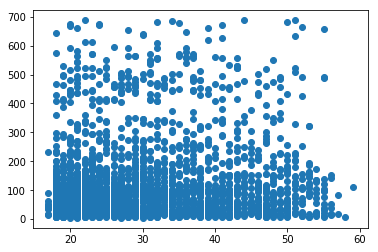

In [41]:
plt.scatter(data['Age'], data['days_worked_uptoday']);

In [47]:
data.groupby('Gender')['days_worked_uptoday'].mean()

Gender
0    130.844622
1    110.449612
Name: days_worked_uptoday, dtype: float64

In [48]:
data.groupby('source_id')['days_worked_uptoday'].mean()

source_id
candidate_source_1     138.112903
candidate_source_10     90.000000
candidate_source_12    160.240741
candidate_source_13     18.000000
candidate_source_15     72.104167
candidate_source_16    179.000000
candidate_source_19    205.000000
candidate_source_21    174.000000
candidate_source_26     13.000000
candidate_source_32     50.000000
candidate_source_37     93.400000
candidate_source_40    133.000000
candidate_source_43    125.800000
candidate_source_47    263.000000
candidate_source_48    197.333333
candidate_source_5     262.333333
candidate_source_50     46.105263
candidate_source_52     34.000000
candidate_source_54    106.000000
candidate_source_55     88.000000
candidate_source_6      86.409091
candidate_source_7     168.722222
candidate_source_8     419.500000
candidate_source_9      85.314815
emp_ref                104.142857
hh.ru                  109.023256
job-mo.ru               82.071429
lamoda                 197.714286
rabota.mail.ru         180.333333
rabo

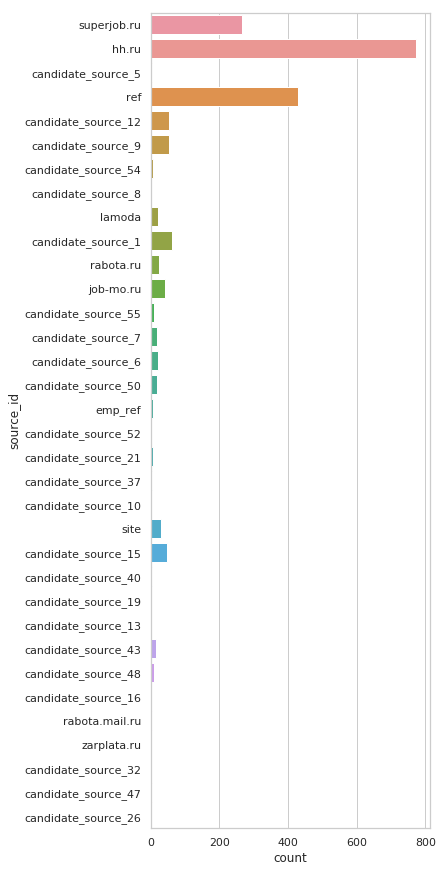

In [57]:
plt.figure(figsize=(5,15))
sns.countplot(y = 'source_id', data=data);

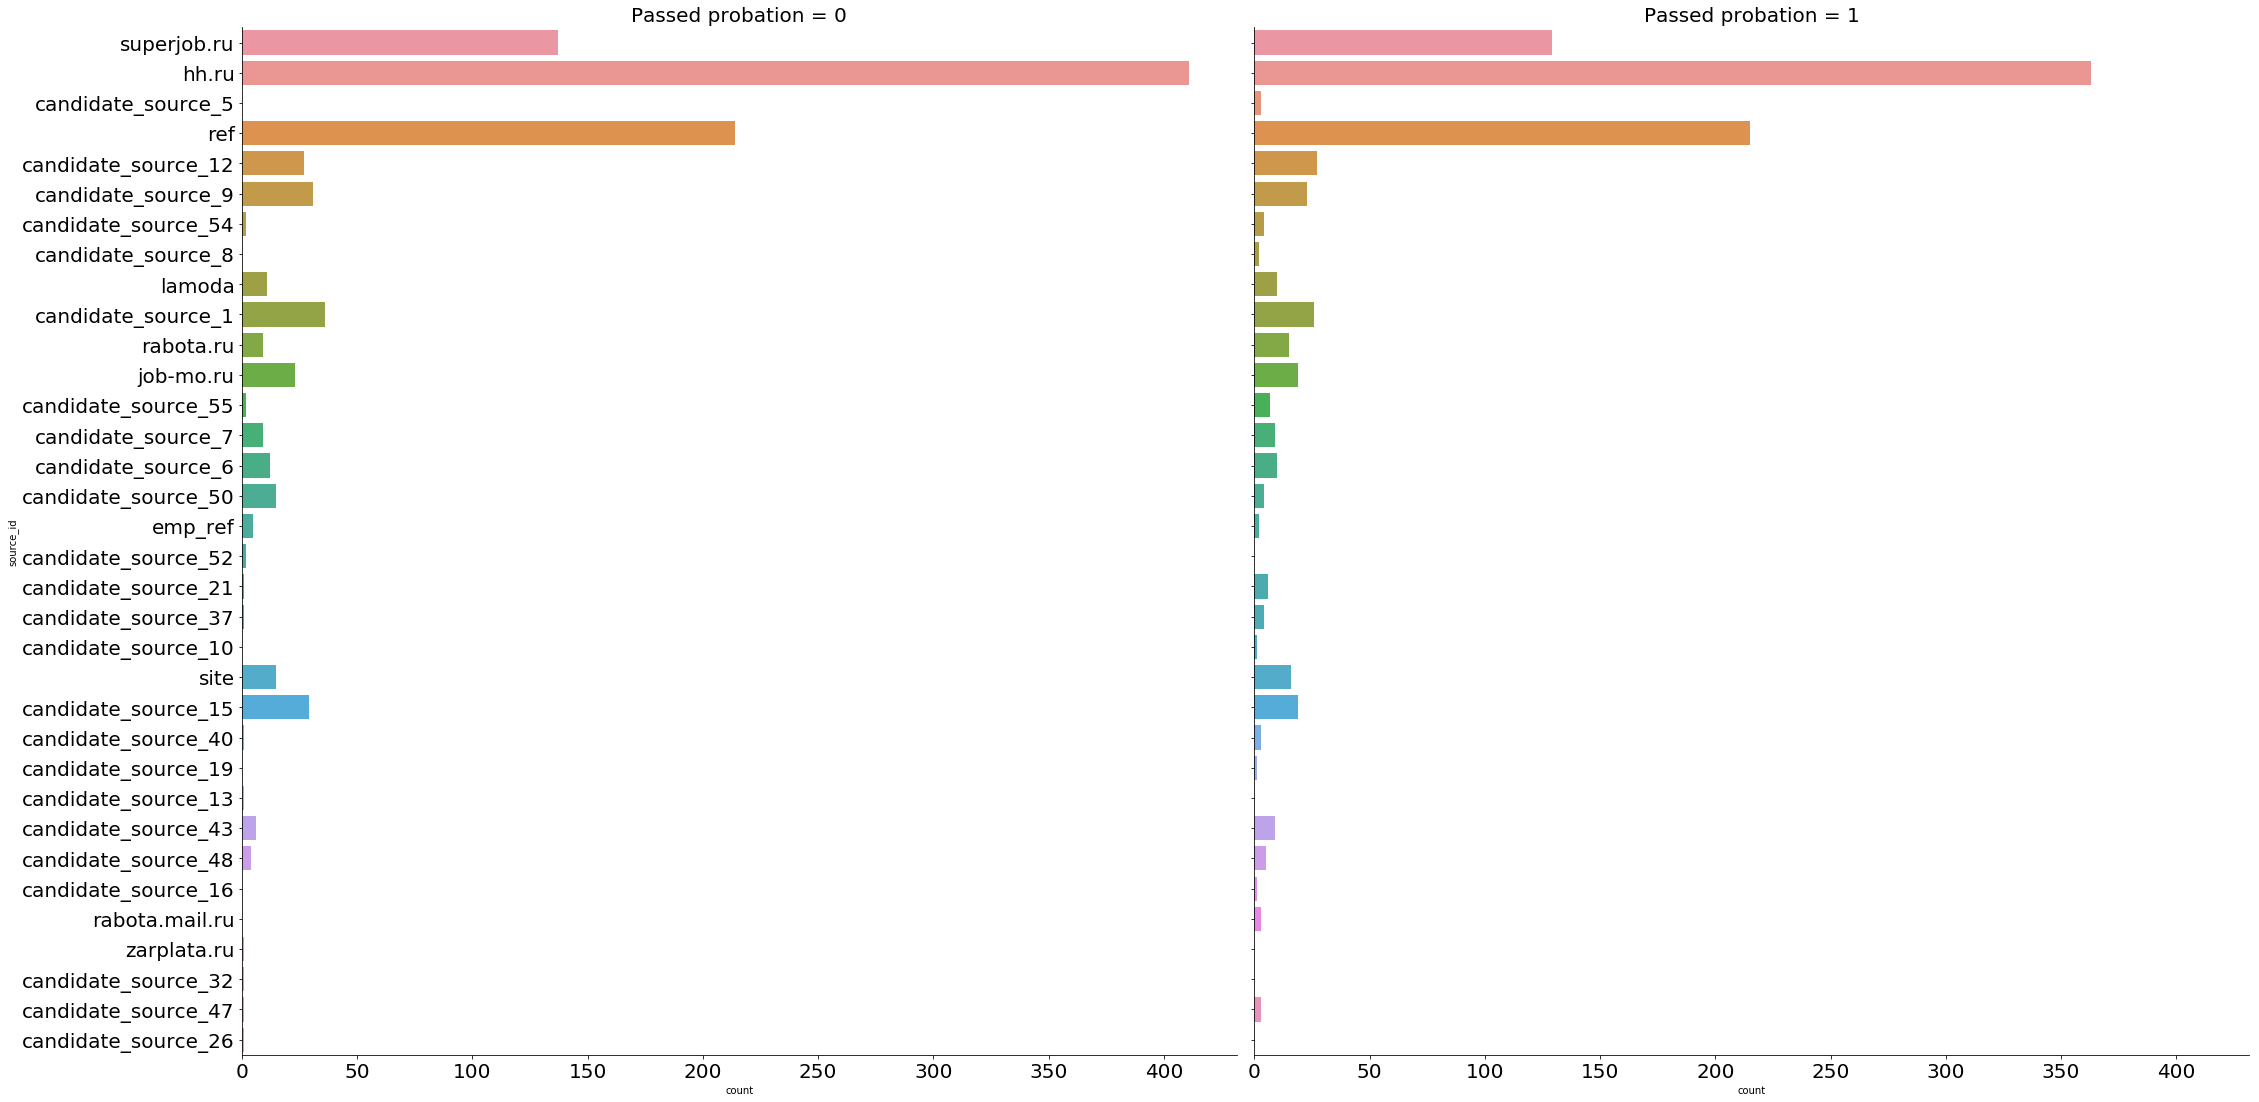

In [101]:
pic = sns.catplot(y = 'source_id', data=data, kind='count', col='Passed probation', height=15);
pic.set_xticklabels(fontsize=20)
pic.set_yticklabels(fontsize=20)
pic.axes[0][0].set_title('Passed probation = 0', fontsize=20)
pic.axes[0][1].set_title('Passed probation = 1', fontsize=20);

In [61]:
data['Passed probation'].mean()

0.48990276738967836

In [11]:
date_columns = ['Start date', 'Quit date']
data[date_columns].head()

,Start date,Quit date
0,29.09.2017,13.11.2017
1,18.08.2017,05.09.2017
2,23.10.2018,18.12.2018
3,26.08.2017,NaN
4,30.06.2018,12.07.2018


In [27]:
data.q_month.dropna().value_counts().sort_values()

3.0      85
2.0      86
5.0     124
4.0     135
6.0     148
1.0     164
7.0     174
12.0    225
9.0     235
10.0    255
8.0     259
11.0    259
Name: q_month, dtype: int64

In [32]:
month = np.array(list(data.q_month.dropna().value_counts().index))
n_quits = data.q_month.dropna().value_counts().values

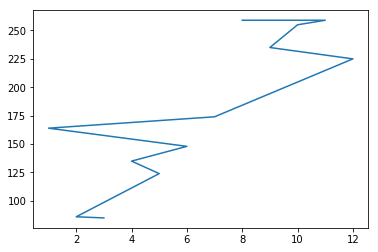

In [34]:
plt.plot(month, n_quits);

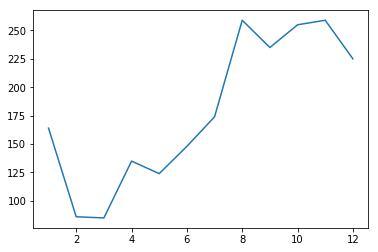

In [35]:
order = np.argsort(month)
plt.plot(month[order], n_quits[order]);

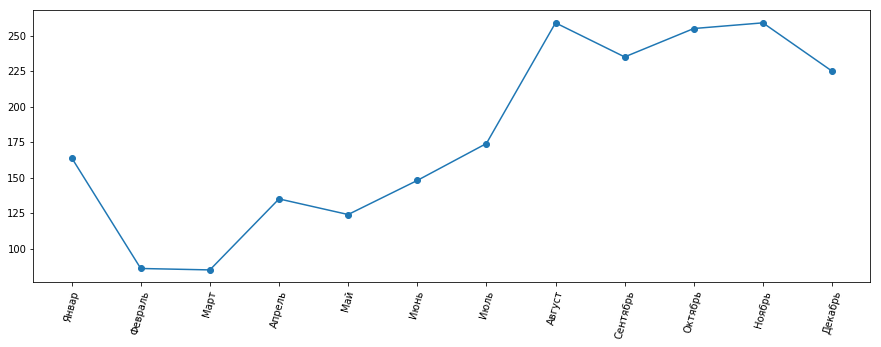

In [51]:
month_names = ['Январ', 'Февраль', 'Март', 'Апрель',
               'Май', 'Июнь', 'Июль', 'Август',
               'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

order = np.argsort(month)
plt.figure(figsize=(15,5))
plt.scatter(month[order], n_quits[order])
plt.plot(month[order], n_quits[order])


plt.xticks(np.arange(1,13), month_names, rotation=75);

In [61]:
data.groupby(['q_year', 'q_month']).count()['Quit date']

q_year  q_month
2017.0  3.0          3
        4.0         43
        5.0         56
        6.0         41
        7.0         50
        8.0         75
        9.0         85
        10.0       108
        11.0       137
        12.0       153
2018.0  1.0        145
        2.0         86
        3.0         82
        4.0         92
        5.0         68
        6.0        107
        7.0        124
        8.0        184
        9.0        150
        10.0       147
        11.0       122
        12.0        72
2019.0  1.0         19
Name: Quit date, dtype: int64

In [58]:
data.groupby(['q_year', 'q_month']).count()['Quit date'].values

array([  3,  43,  56,  41,  50,  75,  85, 108, 137, 153, 145,  86,  82,
        92,  68, 107, 124, 184, 150, 147, 122,  72,  19])

In [60]:
data.groupby(['q_year', 'q_month']).count()['Quit date'].index

MultiIndex(levels=[[2017.0, 2018.0, 2019.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0]],
           names=['q_year', 'q_month'])

In [80]:
def plot_quits_by_month_year():
    month = {}
    n_quits = {}
    for year in [2017, 2018, 2019]:
        series = data[data.q_year==year].q_month.dropna().value_counts().sort_values()
        
        month[year] = np.array(list(series.index))
        n_quits[year] = series.values
        
        
    month_names = ['Январ', 'Февраль', 'Март', 'Апрель',
               'Май', 'Июнь', 'Июль', 'Август',
               'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    
    plt.figure(figsize=(15,5))
    for year in [2017, 2018]:

        order = np.argsort(month[year])

        plt.scatter(month[year][order], n_quits[year][order])
        plt.plot(month[year][order], n_quits[year][order], label = year)


    plt.xticks(np.arange(1,13), month_names, rotation=75);
    plt.legend();
    
    return month, n_quits

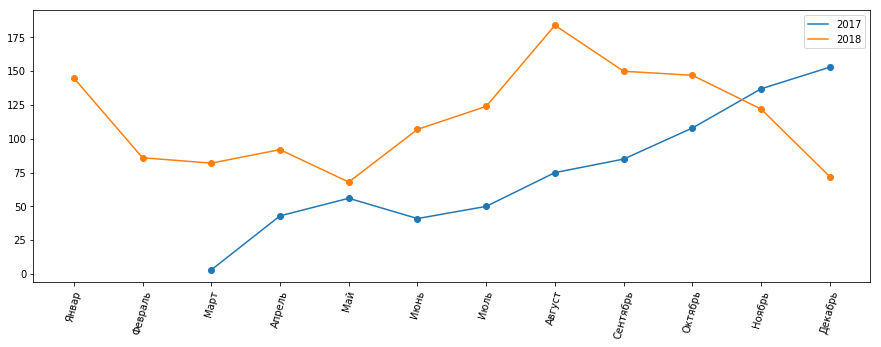

In [81]:
month, n_quits = plot_quits_by_month_year()

In [74]:
month

{2017: array([ 3.,  6.,  4.,  7.,  5.,  8.,  9., 10., 11., 12.]),
 2018: array([ 5., 12.,  3.,  2.,  4.,  6., 11.,  7.,  1., 10.,  9.,  8.]),
 2019: array([1.])}

In [75]:
n_quits

{2017: array([  3,  41,  43,  50,  56,  75,  85, 108, 137, 153]),
 2018: array([ 68,  72,  82,  86,  92, 107, 122, 124, 145, 147, 150, 184]),
 2019: array([19])}

In [104]:
data.head()

,Employee ID,Position ENG,Start date,Base salary monthly,Quit date,Department,Unit,NTT process,Age,Gender,...,TL Active,Commute,Tenure resulting,If include,Passed probation,days_worked,days_worked_uptoday,q_day,q_month,q_year
0,16749,DC employee,2017-09-29,0.300013,2017-11-13,Shift №4,Picking Area,0,33,1,...,1,"13,3485904",46,1,0,45 days,45,13.0,11.0,2017.0
1,16161,DC employee,2017-08-18,1.000000,2017-09-05,Shift №2,New Arrivals Area,0,48,0,...,1,"1,114272525",19,1,0,18 days,18,5.0,9.0,2017.0
2,21271,DC employee,2018-10-23,0.480665,2018-12-18,Shift №4,Pack Item Area,0,22,0,...,1,"13,08236479",57,1,0,56 days,56,18.0,12.0,2018.0
3,16252,DC employee,2017-08-26,1.000000,NaT,Shift №2,New Arrivals Area,0,24,0,...,1,"59,15770908",502,1,1,NaT,514,NaN,NaN,NaN
4,19229,DC employee,2018-06-30,0.480665,2018-07-12,Shift №2,Picking Area,0,34,1,...,1,"9,868861683",13,1,0,12 days,12,12.0,7.0,2018.0


In [106]:
data.groupby(['Unit', 'Department', 'Passed probation'])['days_worked_uptoday'].mean()

Unit                  Department        Passed probation
B2B Area              B2B               0                    35.388889
                                        1                   240.793103
Inventarization Area  Trouble Shooting  0                    39.512821
                                        1                   176.000000
Loading Area          Shift №1          0                    47.700000
                                        1                   224.333333
                      Shift №2          0                    28.571429
                                        1                   207.600000
                      Shift №3          0                    57.000000
                                        1                   188.083333
                      Shift №4          0                    30.222222
                                        1                   185.533333
New Arrivals Area     Shift №1          0                    35.187500
                    

In [110]:
data.groupby('Employee ID').count()['days_worked'].sort_values()

Employee ID
20403    0
20568    0
16117    0
16469    0
18539    0
18538    0
19751    0
20577    0
17047    0
17053    0
15630    0
20137    0
17488    0
17489    0
18523    0
19724    0
20597    0
19721    0
19905    0
15601    0
17178    0
20124    0
18513    0
15591    0
15590    0
19230    0
15584    0
17510    0
20122    0
19236    0
        ..
16823    1
16825    1
16827    1
16814    1
17834    2
19803    2
18949    2
17084    2
20982    2
16989    2
20974    2
17454    2
19509    2
15929    2
20871    2
16185    2
18313    2
16905    2
16994    2
17237    2
16217    2
16928    2
15374    2
15410    2
16947    2
19749    2
15492    2
17789    2
16005    2
17234    2
Name: days_worked, Length: 2645, dtype: int64